<a href="https://colab.research.google.com/github/mburnskaurin/phy151-lab-f20/blob/master/FitDataCurveFit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div align='center'><h1>Program to Curve Fit</h1></div>  
This program will fit data to a curve of your choice that has as many parameters as you wish. The curve below is that of a straight line with two parameters - slope and intercept. Change it for your purposes.

The function is found in the scipy package, which must be imported. It is called optimize.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
%matplotlib inline

Upload your file, as usual. The file should contain one data point per line with three numbers - x-value, y-value, uncertainty in the y-value.  

Note:  In this document, x is short-hand for the horizontal (independent) variable and y is short-hand for the vertical (dependent) variable.  Your values may not be actual x and y.  For instance, if you measured position x at various times t using video analysis, then your independent variable is t (horizontal) and your dependent variable is x (vertical).  In that case, what this document calls x is your t, and what this document calls y is your x.

The numbers in a line should be separated by commas (csv file).

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving const a data t y del_y.txt to const a data t y del_y.txt


Type the name of your file on the right.

In [ ]:
filename = "const a data t y del_y.txt" #@param {type:"string"}


Your file is read using the loadtxt function in numpy. Each of your x-value is place in the numpy array named xvalues; each of your y-value is placed in the numpy array named yvalues; and each of your uncertainy in your y-value is placed in the numpy array named yuncert.

In [ ]:
xvalues,yvalues,yuncert = np.loadtxt(filename,dtype='float',delimiter=',', unpack=True)
print(xvalues,yvalues,yuncert)

[0. 1. 2. 3. 4.] [ 0.5  3.3 11.9 28.  48.5] [0.1  0.1  0.15 0.2  0.25]


Before you start curve-fitting, it is a good idea to see what the data look like.  Refer to your previous homework, and after this text block insert a code block that will plot the data (including error bars).

The first step in the curve-fitting process is to create a function that you want to use to fit the data. The input to the function are the x-value, followed by the parameters. In this case there are two parameters which are called p1 and p2 that are used to represent the slope and intercept.

In [ ]:
#Define a function for a straight line; change for your function and remove this comment.
def fitfunc(x,p1,p2):
  y = p1*x + p2
  return y

The function to fit the data and get the best values of the parameters is optimize.curve_fit.  The next two lines of code are somewhat complicated, especially the second one.  Read carefully, and look at the code as you read each sentence.

This function takes several inputs as follows.  
- The first is the name of your function used to fit the data. In this case, it was called fitfunc.
- The second is the numpy array that has the x-values.
- The third is the numpy array that has the y-values.
- The fourth is the numpy array that has the initial values of the parameters that you choose. You must first create this array as the first line of the code cell below does.  The parameters are in the same order as in your fitfunc (in this case, slope then intercept).
- The fifth is the numpy array that has the uncertainites in the y-values.  

The ouput of the function is as follows.  
- The first array contains the best fit parameters.
- The second array contains what is called the covariance matrix. It is a square matrix, where the number of rows is the number of parameters. Each entry of this second array is a row of that matrix. The diagonal elements of this matrix is the square of the uncertainty of the parameters.

In [ ]:
param = np.array([0.0, 0.0])
out = optimize.curve_fit(fitfunc, xvalues, yvalues, param, yuncert)
print(out)

(array([10.08095146, -3.22494654]), array([[ 5.13217769, -5.8953119 ],
       [-5.8953119 , 13.64252297]]))


The following code is not necessary, but it is included here to extract the best values of the parameters and their uncertainties from the output of the optimize.curve_fit function.

- out[0] accesses the first array of the output.  
- out[0][0] accesses the first entry of the first array, which is the best value of the first parameter.
- out[0][1] accesses the second entry of the first array, which is the best value of the second parameter.
- out[1] accesses the second array, which is the covariance matrix.
- out[1][0] accesses the second array and the first row of the covariance matrix.
- out[1][0][0] accesses the first entry of the first row, which is the square of the uncertainty of the first parameter. We take the square root to get the uncertainty on the first parameter.
- What does out[1][1][1] do?

In [ ]:
print('slope =',out[0][0],'+/-',out[1][0][0]**0.5)
print('intercept =',out[0][1],'+/-',out[1][1][1]**0.5)

slope = 10.080951461827196 +/- 2.2654310171561387
intercept = -3.2249465449918975 +/- 3.693578613379863


<h1>Graphing the Data and Fitted Curve</h1>

<ErrorbarContainer object of 3 artists>

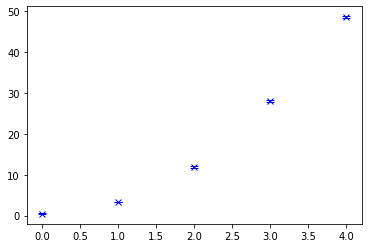

In [ ]:
#Create an array, named yfit, to store the y-values of the function at the x-values
yfit = []
for x in xvalues:
  yfit.append(fitfunc(x,out[0][0],out[0][1]))   #use the best fit parameters



In order to put error bars on the data points, use the function plt.errorbar(array with x, array with y, yerr = array with uncertainty, fmt = how to plot data, capsize = length of caps on error bars).  

You will need to put appropriate labels and title.

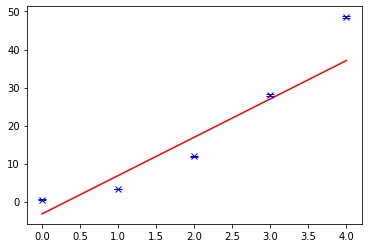

In [ ]:
plt.errorbar(xvalues,yvalues,yerr = yuncert,fmt='bx',capsize=4)
plt.plot(xvalues,yfit,'r-')
plt.show()